In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import pickle
from copy import deepcopy
from load_files_pop import Z_20, Z_200, Z_2000
plt.style.use('/Users/kdreyer/Documents/Github/GraphGA/paper.mplstyle.py')
grey_ = [(i/255) for i in [150, 150, 150]]
orange_ = [i/255 for i in [230, 159, 0]]
sky_blue = [i/255 for i in [86, 180, 233]]
pink_ = [i/255 for i in [204, 121, 167]]
bluish_green = [i/255 for i in [0, 158, 115]]
vermillion = [i/255 for i in [213, 94, 0]]
yellow_ = [i/255 for i in [240, 228, 66]]
repo_path_sp = "/Users/kdreyer/Library/CloudStorage/OneDrive-NorthwesternUniversity/KatieD_LL/GCAD_Collab/Selected_GA_results_paper/"
repo_path_git = "/Users/kdreyer/Documents/Github/GraphGA/GA_results/"

In [3]:
Z_20_df = pd.DataFrame(data = Z_20, columns = ["plasmid_" + str(i) for i in range(5)])
# Z_20_df_log = Z_20_df.copy()
Z_200_df = pd.DataFrame(data = Z_200, columns = ["plasmid_" + str(i) for i in range(9)])
Z_200_df = Z_200_df.drop(labels=["plasmid_" + str(i) for i in range(5,9)], axis=1)

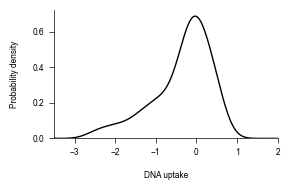

In [25]:
# display(Z_200_df)
fig, ax = plt.subplots(figsize=(3, 2))
Z_df_200_log = Z_200_df.copy()
for i, column in enumerate(Z_df_200_log.columns):
    Z_df_200_log[column] = np.log10(Z_df_200_log[column])

Z_df_200_log["plasmid_2"].plot.kde(ind=200, ax=ax, color="k", linewidth="1")
ax.set_xlim([-3.5, 2])
ax.set_ylim(bottom=0)
ax.set_xlabel("DNA uptake")
ax.set_ylabel("Probability density")
plt.savefig("/Users/kdreyer/Desktop/plasmid_uptake_200.svg")

## 200 cell model analysis

### Frac_pulse

### single cell topologies

In [196]:
from pulse_generator_problem import PulseGenerator
all_cell_200 = pd.read_pickle("/Users/kdreyer/Desktop/pulse_single_plasmid_uptake_200/200_cell_all_cell_results_df_opt.pkl")
all_cell_20 = pd.read_pickle("/Users/kdreyer/Desktop/pulse_single_plasmid_uptake_200/20_cell_all_cell_results_df_opt.pkl")

pulse_20 = PulseGenerator(promo_node="P1", dose_specs=[5, 75, 5], max_part=2, inhibitor=True, 
                            DsRed_inhibitor=True, num_dict={}, n_gen=None, probability_crossover=None, 
                            probability_mutation=None, mutate_dose=True, pop=True, num_processes=8, 
                            max_time=126, single_cell_tracking=True)

# display(all_cell_200)
# display(Z_200_df)
for index, row in all_cell_200.iterrows():
    all_cell200_prom_list = row["single_cell_prominence"]
    all_cell200_peak_list = row["single_cell_peaks"]

    # all_cell20_prom_list = all_cell_20.at[index,"single_cell_prominence"]
    # all_cell20_peak_list = all_cell_20.at[index,"single_cell_peaks"]

#     all_cell20_prom_list = all_cell_20.at[index, "single_cell_prominence"]
#     all_cell20_peak_list = all_cell_20.at[index, "single_cell_peaks"]
    rep_rel_mean20 = all_cell_20.at[index, "Rep_rel time series mean"]

    peak_rel_20 = pulse_20.calc_peak_rel(rep_rel_mean20)
    prom_rel_20 = pulse_20.calc_prominence_rel(rep_rel_mean20, peak_rel_20)


    rep_rel_mean200 = row["Rep_rel time series mean"]

    peak_rel_200 = pulse_20.calc_peak_rel(rep_rel_mean200)
    prom_rel_200 = pulse_20.calc_prominence_rel(rep_rel_mean200, peak_rel_200)

    avg_no_pulse = []
    avg_pulse = []
    other_plasmids_pulse = []
    other_plasmids_no_pulse = []
    peak_no_pulse = []
    prom_rel_pulse = []
    prom_rel_all = []
    avg_list = []
    inh_uptake_pulse = []
    inh_uptake_no_pulse = []
    zf_uptake_pulse = []
    zf_uptake_no_pulse = []
    # rep_uptake_no_pulse = []
    # rep_uptake_pulse = []


    if prom_rel_20 > 0 and prom_rel_200 == 0:
        # print(index)
        print(prom_rel_20)
        parts_dict = row["Topology"].in_dict
        # parts_order = list(row["Topology"].in_dict.keys())
        print(index, parts_dict)
        # print(row["Topology"].dose)
#         if index in [17, 18, 24, 27, 34, 35]:
#             # print(row["Topology"].dose)
#             # print(index, parts_dict)
#             inh_plasmid = 0
#             zf_plasmid = [1, 2] 
#             other_plasmids = [1, 2, 3]
#         else:
#             inh_plasmid = 2
#             zf_plasmid = [0, 1]
#             other_plasmids = [0, 1, 3]
#             # print(index, parts_dict)
# #         prom_rel_all.append(all_cell200_prom_list)
#         plt.figure(figsize=(2,2))
#         for cell in range(200):
#             uptake_list = Z_200_df.iloc[cell].tolist()[:-1]
#             cell_prom = all_cell200_prom_list[cell]
#             avg_uptake = np.mean(uptake_list)
#             # if cell_prom == 0:
#             # plt.plot(np.arange(0, 127, 1), all_cell_20.at[index, "Rep_rel time series for each cell"][cell])
#             # plt.xlim([0, 42])
#             # uptake_list = Z_20_df.iloc[cell].tolist()[:-1]
#             # # print(uptake_list)
#             inh_uptake = uptake_list[inh_plasmid]
#             zf_uptake = np.mean([uptake_list[zf_plasmid[0]], uptake_list[zf_plasmid[1]]])
#             # # zf_uptake_p1 = uptake_list[zf_plasmid[0]]
#             # # zf_uptake_zf = uptake_list[zf_plasmid[1]]
#             other_plasmids_uptake = np.mean([uptake_list[i] for i in other_plasmids])
#             # # cell_prom = all_cell200_prom_list[cell]
#             # cell_prom = all_cell20_prom_list[cell]
#             # avg_uptake = np.mean(uptake_list)

#             if cell_prom == 0:
#                 zf_uptake_no_pulse.append(zf_uptake)
#                 inh_uptake_no_pulse.append(inh_uptake)
#                 other_plasmids_no_pulse.append(other_plasmids_uptake)
#                 avg_no_pulse.append(avg_uptake)
#                 if avg_uptake >3 and index == 24:
#                     print(index, avg_uptake, all_cell200_peak_list[cell])
#                 # if all_cell200_peak_list[cell] > 300:
#                 #     print(index, all_cell200_peak_list[cell], inh_uptake, other_plasmids_uptake)

#             else:
#                 zf_uptake_pulse.append(zf_uptake)
#                 inh_uptake_pulse.append(inh_uptake)
#                 avg_pulse.append(avg_uptake)
#                 other_plasmids_pulse.append(other_plasmids_uptake)


#         # plt.figure(figsize=(2, 2))
#         # plt.hist(avg_pulse, bins=20, color="k", density=True, label="pulse")
#         # plt.hist(avg_no_pulse, bins=20, color="darkgrey", density=True, label="non-pulse")
#         # plt.xlabel("average plasmid uptake")
#         # plt.ylabel("probability density")
#         # plt.legend()

#         # plt.plot(avg_no_pulse, inh_uptake_no_pulse, linestyle="none", marker="o", color="r", markersize="1")
#         # plt.plot(avg_pulse, inh_uptake_pulse, linestyle="none", marker="o", color="k", markersize="1")
#         plt.plot(zf_uptake_no_pulse, inh_uptake_no_pulse, linestyle="none", marker="o", color="k", markersize="1", label="no pulse")
#         plt.plot(zf_uptake_pulse, inh_uptake_pulse, linestyle="none", marker="o", color="grey", markersize="1")
#         # plt.plot([0, 3], [0, 3], linestyle="dashed", color="k", zorder=10, linewidth="1")
#         # plt.plot(other_plasmids_no_pulse, inh_uptake_no_pulse, linestyle="none", marker="o", color="r", markersize="2")
#         # plt.plot(other_plasmids_pulse, inh_uptake_pulse, linestyle="none", marker="o", color="k", markersize=2)
#         # plt.xlabel("other plasmid uptake")
#         # # plt.xlim(0,2)
#         # # plt.ylim(0, 2)
#         # # # plt.xlabel("ZF p1")
#         # plt.ylabel("inhibitor uptake")
#         # plt.legend()

#         plt.show()
#         # plt.savefig("/Users/kdreyer/Desktop/200-cell_all_ts" + str(index) + ".svg")
#         # plt.savefig("/Users/kdreyer/Desktop/20_cell_ts_" + str(index) + ".svg")

4.082207573480019
12 {'Z6': {'P': ['P1'], 'Z': ['Z6'], 'I': ['I13']}, 'I13': {'P': [], 'Z': ['Z6'], 'I': []}, 'Rep': {'P': [], 'Z': ['Z6'], 'I': []}}
5.203635091464676
17 {'I13': {'P': [], 'Z': ['Z6'], 'I': []}, 'Z6': {'P': ['P1'], 'Z': ['Z6'], 'I': ['I13']}, 'Rep': {'P': [], 'Z': ['Z6'], 'I': []}}
5.615217929814676
18 {'I13': {'P': [], 'Z': ['Z6'], 'I': []}, 'Z6': {'P': ['P1'], 'Z': ['Z6'], 'I': ['I13']}, 'Rep': {'P': [], 'Z': ['Z6'], 'I': []}}
1.017210973188348
21 {'Z6': {'P': ['P1'], 'Z': ['Z6'], 'I': ['I2']}, 'I2': {'P': [], 'Z': ['Z6'], 'I': []}, 'Rep': {'P': [], 'Z': ['Z6'], 'I': ['I2']}}
2.9618716341894427
24 {'I13': {'P': [], 'Z': ['Z6'], 'I': []}, 'Z6': {'P': ['P1'], 'Z': ['Z6'], 'I': ['I13']}, 'Rep': {'P': [], 'Z': ['Z6'], 'I': ['I13']}}
0.7826642030363091
25 {'Z6': {'P': ['P1'], 'Z': ['Z6'], 'I': ['I11']}, 'I11': {'P': [], 'Z': ['Z6'], 'I': []}, 'Rep': {'P': [], 'Z': ['Z6'], 'I': ['I11']}}
3.1413551856098367
27 {'I13': {'P': [], 'Z': ['Z6'], 'I': []}, 'Z6': {'P': ['P1'], 'Z'

In [ ]:


#         fig, axs = plt.subplots(2, 3, figsize= (8, 4)) #, sharex=True)
#         axs[0,0].plot(avg_no_pulse, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k")
#         axs[0,0].set_xlabel("Average plasmid uptake")
#         axs[0,0].set_ylabel("Peak_rel")
#         axs[0,0].set_xlim(ax.get_xlim())
#         axs[0,0].set_title("Non-Pulse Cells Average Plasmid Uptake vs. Peak_rel")

#         axs[0,1].plot(avg_pulse, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue)
#         axs[0,1].set_xlabel("Average plasmid uptake")
#         axs[0,1].set_ylabel("Prominence_rel")
#         axs[0,1].set_xlim(ax.get_xlim())
#         axs[0,1].set_title("Pulse Cells Average Plasmid Uptake vs. Prominence_rel")

#         axs02_2 = axs[0,2].twinx()
#         axs02_2.plot(avg_no_pulse, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k", label="no pulse")
#         axs[0,2].plot(avg_pulse, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue, label="pulse")
#         axs[0,2].set_xlabel("Average plasmid uptake")
#         axs[0,2].set_ylabel("Prominence_rel")
#         axs02_2.set_ylabel("Peak_rel")
#         axs[0,2].set_zorder(axs02_2.get_zorder()+1)
#         axs[0,2].patch.set_visible(False)
#         axs[0,2].spines[['right']].set_visible(True)
#         axs[0,2].set_title("Average Plasmid Uptake vs. Prominence_rel or Peak_rel")
#         axs[0,2].legend()

        # axs[1,0].plot(inh_rel_no_pulse_list, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k")
        # axs[1,0].set_xlabel("Relative synTF-R plasmid uptake")
        # axs[1,0].set_ylabel("Peak_rel")
        # axs[1,0].set_title("Non-Pulse Cells Relative synTF-R Plasmid Uptake vs. Peak_rel")

        # axs[1,1].plot(inh_rel_pulse_list, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue)
        # axs[1,1].set_xlabel("Relative synTF-R plasmid uptake")
        # axs[1,1].set_ylabel("Prominence_rel")
        # # axs[1,1].set_xlim(0, 5)
        # axs[1,1].set_title("Pulse Cells Relative synTF-R Plasmid Uptake vs. Prominence_rel")

        # axs12_2 = axs[1,2].twinx()
        # axs12_2.plot(inh_rel_no_pulse_list, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k", label="no pulse")
        # axs[1,2].plot(inh_rel_pulse_list, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue, label="pulse")
        # axs[1,2].set_xlabel("Relative synTF-R plasmid uptake")
        # axs[1,2].set_ylabel("Prominence_rel")
        # axs12_2.set_ylabel("Peak_rel")
        # axs[1,2].set_zorder(axs12_2.get_zorder()+1)
        # axs[1,2].patch.set_visible(False)
        # axs[1,2].spines[['right']].set_visible(True)
        # # axs[1,2].set_xlim(0, 5)
        # axs[1,2].set_title("Relative synTF-R Plasmid Uptake vs. Prominence_rel or Peak_rel")
        # # axs[1,2].legend()
        # axs12_2.legend()

        
# # # #     # plt.savefig(path_save+"plasmid_uptake_plots_"+ str(index) + ".svg")

# [17, 18, 24, 27, 34, 35]

<!-- ### Arithmetic mean 20-cell topologies -->

## ZF1/ZF2 Experimental topologies

### 200-cell uptake analysis

In [ ]:
path_pulses = "Pulse_pop/Experiment_synTF1&2/200_cell_all_cell_results_df.pkl"
path_save = repo_path_sp + "Pulse_pop/Experiment_synTF1&2/"

all_cell_results_df = pd.read_pickle(repo_path_sp+path_pulses)
display(all_cell_results_df)
# for index, row in all_cell_results_df.iterrows():
#     print(row["Topology"].in_dict)


3.1749698575205954


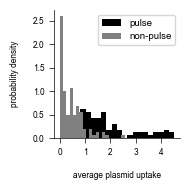

3.1749698575205954


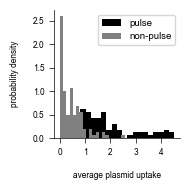

3.1749698575205954


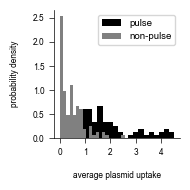

3.1749698575205954


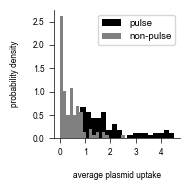

3.1749698575205954


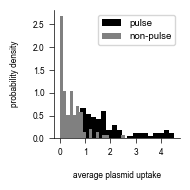

3.1749698575205954


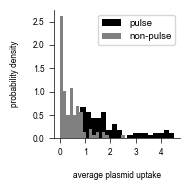

In [198]:
for index, row in all_cell_results_df.iterrows():
    all_cell_prom_list = row["single_cell_prominence"]
    all_cell_peak_list = row["single_cell_peaks"]
    all_cell_ts = row["Rep_rel time series for each cell"]

    # fig, axs = plt.subplots(3, 2, figsize= (6, 6), sharex=True)
    avg_list = []
    avg_no_pulse = []
    avg_pulse = []

    inh_rel_no_pulse_list = []
    peak_no_pulse = []

    inh_rel_pulse_list = []
    prom_rel_pulse = []
    for cell in range(200):
        # plt.plot(np.arange(0, 127, 1), all_cell_ts[cell])
        uptake_list = Z_200_df.iloc[cell].tolist()
        uptake_list_no_p0 = deepcopy(uptake_list)[:-1]
        uptake_list_no_p0.pop(0)
        avg_no_inh = np.mean(uptake_list_no_p0)
        inh_uptake = uptake_list[0]
        avg_uptake = np.mean(uptake_list)
        avg_list.append(avg_uptake)
        cell_prom = all_cell_prom_list[cell]

        # if row["single_cell_peaks"][cell] > 20:
        #     print(row["single_cell_peaks"][cell], avg_uptake)

        if cell_prom == 0:
            avg_no_pulse.append(avg_uptake)
            peak_no_pulse.append(all_cell_peak_list[cell])
            inh_rel = inh_uptake/avg_no_inh
            inh_rel_no_pulse_list.append(inh_rel)
        else:
            avg_pulse.append(avg_uptake)
            prom_rel_pulse.append(all_cell_prom_list[cell])
            inh_rel = inh_uptake/avg_no_inh
            inh_rel_pulse_list.append(inh_rel)


    print(max(avg_pulse)*0.7)
    # plot histograms pulse vs. no pulse
    plt.figure(figsize=(2, 2))
    plt.hist(avg_pulse, bins=20, color="k", density=True, label="pulse")
    plt.hist(avg_no_pulse, bins=20, color="grey", density=True, label="non-pulse")
    plt.xlabel("average plasmid uptake")
    plt.ylabel("probability density")
    plt.legend()

    plt.show()
    # plt.savefig(path_save+"plasmid_uptake_histograms_"+ str(index) + ".svg")

## 20 cell model analysis

#### single cell topologies

12 2.278303859087682 52.68937291394298
12 1.9579295288381857 33.99859953611775
12 2.012806874613406 98.03577051593194
17
17 2.490986826261574 69.75398801665186
17 2.012806874613406 31.737826475572334
18
18 2.490986826261574 66.98780976982938
18 2.012806874613406 29.772870867794655
21 2.012806874613406 36.6824123563039
24
27


<Figure size 200x200 with 0 Axes>

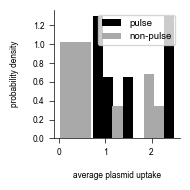

<Figure size 200x200 with 0 Axes>

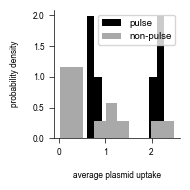

<Figure size 200x200 with 0 Axes>

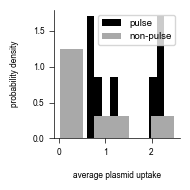

<Figure size 200x200 with 0 Axes>

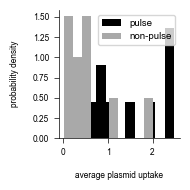

<Figure size 200x200 with 0 Axes>

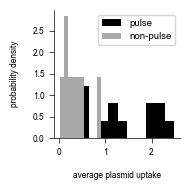

<Figure size 200x200 with 0 Axes>

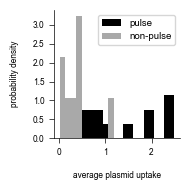

<Figure size 200x200 with 0 Axes>

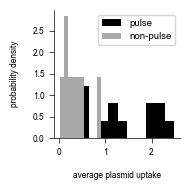

<Figure size 200x200 with 0 Axes>

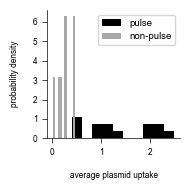

In [187]:
from pulse_generator_problem import PulseGenerator
all_cell_200 = pd.read_pickle("/Users/kdreyer/Desktop/pulse_single_plasmid_uptake_200/200_cell_all_cell_results_df_opt.pkl")
all_cell_20 = pd.read_pickle("/Users/kdreyer/Desktop/pulse_single_plasmid_uptake_200/20_cell_all_cell_results_df_opt.pkl")

pulse_20 = PulseGenerator(promo_node="P1", dose_specs=[5, 75, 5], max_part=2, inhibitor=True, 
                            DsRed_inhibitor=True, num_dict={}, n_gen=None, probability_crossover=None, 
                            probability_mutation=None, mutate_dose=True, pop=True, num_processes=8, 
                            max_time=126, single_cell_tracking=True)

# display(all_cell_200)
# display(Z_200_df)
for index, row in all_cell_20.iterrows():
    all_cell20_prom_list = row["single_cell_prominence"]
    all_cell20_peak_list = row["single_cell_peaks"]

    rep_rel_mean20 = all_cell_20.at[index, "Rep_rel time series mean"]

    peak_rel_20 = pulse_20.calc_peak_rel(rep_rel_mean20)
    prom_rel_20 = pulse_20.calc_prominence_rel(rep_rel_mean20, peak_rel_20)

    rep_rel_mean200 = all_cell_200.at[index, "Rep_rel time series mean"]

    peak_rel_200 = pulse_20.calc_peak_rel(rep_rel_mean200)
    prom_rel_200 = pulse_20.calc_prominence_rel(rep_rel_mean200, peak_rel_200)

    avg_no_pulse = []
    avg_pulse = []
    other_plasmids_pulse = []
    other_plasmids_no_pulse = []
    peak_no_pulse = []
    prom_rel_pulse = []
    prom_rel_all = []
    avg_list = []
    inh_uptake_pulse = []
    inh_uptake_no_pulse = []
    zf_uptake_pulse = []
    zf_uptake_no_pulse = []
    # rep_uptake_no_pulse = []
    # rep_uptake_pulse = []


    if prom_rel_20 > 0 and prom_rel_200 == 0:
        # print(index)
        # print(prom_rel_20)
        # parts_dict = row["Topology"].in_dict
        # parts_order = list(row["Topology"].in_dict.keys())
        # print(index, parts_dict)
        # print(row["Topology"].dose)
        if index in [17, 18, 24, 27, 34, 35]:
            print(index)
            # print(row["Topology"].dose)
            # print(index, parts_dict)
            inh_plasmid = 0
            zf_plasmid = [1, 2] 
            other_plasmids = [1, 2, 3]
        else:
            inh_plasmid = 2
            zf_plasmid = [0, 1]
            other_plasmids = [0, 1, 3]
            # print(index, parts_dict)
#         prom_rel_all.append(all_cell200_prom_list)
        plt.figure(figsize=(2,2))
        for cell in range(20):
            uptake_list = Z_20_df.iloc[cell].tolist()[:-1]
            cell_prom = all_cell20_prom_list[cell]
            avg_uptake = np.mean(uptake_list)
            # print(all_cell_20.at[index, "Rep_rel time series for each cell"][cell])
            # if cell_prom == 0:
            # plt.plot(np.arange(0, 127, 1), all_cell_20.at[index, "Rep_rel time series for each cell"][cell])
            # plt.xlim([0, 42])
            # uptake_list = Z_20_df.iloc[cell].tolist()[:-1]
            # # print(uptake_list)
            # inh_uptake = uptake_list[inh_plasmid]
            # zf_uptake = np.mean([uptake_list[zf_plasmid[0]], uptake_list[zf_plasmid[1]]])
            # # zf_uptake_p1 = uptake_list[zf_plasmid[0]]
            # # zf_uptake_zf = uptake_list[zf_plasmid[1]]
            # other_plasmids_uptake = np.mean([uptake_list[i] for i in other_plasmids])
            # # cell_prom = all_cell200_prom_list[cell]
            # cell_prom = all_cell20_prom_list[cell]
            # avg_uptake = np.mean(uptake_list)

            if cell_prom == 0:
            #     zf_uptake_no_pulse.append(zf_uptake)
                # inh_uptake_no_pulse.append(inh_uptake)
                # other_plasmids_no_pulse.append(other_plasmids_uptake)
                avg_no_pulse.append(avg_uptake)
                if avg_uptake >1.5: #and index == 24:
                    print(index, avg_uptake, all_cell20_peak_list[cell])
                # if all_cell200_peak_list[cell] > 300:
                #     print(index, all_cell200_peak_list[cell], inh_uptake, other_plasmids_uptake)

            else:
            #     zf_uptake_pulse.append(zf_uptake)
            #     inh_uptake_pulse.append(inh_uptake)
                avg_pulse.append(avg_uptake)
            #     other_plasmids_pulse.append(other_plasmids_uptake)


        plt.figure(figsize=(2, 2))
        plt.hist(avg_pulse, bins=10, color="k", density=True, label="pulse")
        plt.hist(avg_no_pulse, bins=10, color="darkgrey", density=True, label="non-pulse")
        plt.xlabel("average plasmid uptake")
        plt.ylabel("probability density")
        plt.legend()

        # plt.plot(avg_no_pulse, inh_uptake_no_pulse, linestyle="none", marker="o", color="r", markersize="1")
        # plt.plot(avg_pulse, inh_uptake_pulse, linestyle="none", marker="o", color="k", markersize="1")
        # plt.plot(zf_uptake_no_pulse, inh_uptake_no_pulse, linestyle="none", marker="o", color="k", markersize="1", label="no pulse")
        # plt.plot(zf_uptake_pulse, inh_uptake_pulse, linestyle="none", marker="o", color="grey", markersize="1")
        # plt.plot([0, 3], [0, 3], linestyle="dashed", color="k", zorder=10, linewidth="1")
        # # plt.plot(other_plasmids_no_pulse, inh_uptake_no_pulse, linestyle="none", marker="o", color="r")
        # # plt.plot(other_plasmids_pulse, inh_uptake_pulse, linestyle="none", marker="o", color="k")
        # plt.xlabel("other plasmid uptake")
        # # plt.xlim(0,2)
        # # plt.ylim(0, 2)
        # # # plt.xlabel("ZF p1")
        # plt.ylabel("inhibitor uptake")
        # plt.legend()

        # plt.show()
        # plt.savefig("/Users/kdreyer/Desktop/200-cell_all_ts" + str(index) + ".svg")
        # plt.savefig("/Users/kdreyer/Desktop/20_cell_ts_" + str(index) + ".svg")
        plt.savefig("/Users/kdreyer/Desktop/20_plasmid_uptake_histogram_" + str(index) + ".svg")

<!-- #### frac_pulse -->

In [ ]:
results_path = "Pulse_pop/Z_mat_20v200_comparison/frac_pulse/frac_pulse_Z20/2024-09-12_results_analysis/"
file_name = "all_cell_metrics_full_pareto_front.pkl"
all_cell_metrics = pd.read_pickle(repo_path_sp+results_path+file_name)
### selected solutions with high rep_rel non-pulse cells (2 topologies, 5-7|| 10-12; 13)
idx_list = [5, 7, 10, 13] # p2 inh 13; p23 inh: 5, 7; p0 10

for idx in idx_list:
    all_cell_prom_list = all_cell_metrics["single_cell_prominence"].tolist()[idx]
    all_cell_peak_list = all_cell_metrics["single_cell_peaks"].tolist()[idx]

    ### avg plasmid uptake vs prominence_rel or peak_rel
    avg_list = []
    avg_no_pulse = []
    avg_pulse = []
    inh_rel_no_pulse_list = []
    peak_no_pulse = []
    inh_rel_pulse_list = []
    prom_rel_pulse = []
    for cell in range(20):
        uptake_list = Z_200_df.iloc[cell].tolist()
        if idx == 13:
            uptake_list_no_p2 = deepcopy(uptake_list)[:-1]
            uptake_list_no_p2.pop(2)
            avg_no_inh = np.mean(uptake_list_no_p2)
            inh_uptake = uptake_list[2]
        elif idx == 10:
            uptake_list_no_p0 = deepcopy(uptake_list)[:-1]
            uptake_list_no_p0.pop(0)
            avg_no_inh = np.mean(uptake_list_no_p0)
            inh_uptake = uptake_list[0]
        elif idx in [5, 7]:
            uptake_list_no_p23 = deepcopy(uptake_list)
            del uptake_list_no_p23[2:4]
            avg_no_inh = np.mean(uptake_list_no_p23)
            inh_uptake = np.mean([uptake_list[2], uptake_list[3]])
        avg_uptake = np.mean(uptake_list)
        avg_list.append(avg_uptake)
        cell_prom = all_cell_prom_list[cell]
        if cell_prom == 0:
            avg_no_pulse.append(avg_uptake)
            peak_no_pulse.append(all_cell_peak_list[cell])
            inh_rel = inh_uptake/avg_no_inh
            inh_rel_no_pulse_list.append(inh_rel)
            # if all_cell_peak_list[cell] > 100:
                # print(idx,"peak_rel: ", all_cell_peak_list[cell], " outlier plasmid uptake: ", uptake_list, uptake_list_no_p23)
                # print(inh_rel)
        else:
            avg_pulse.append(avg_uptake)
            prom_rel_pulse.append(all_cell_prom_list[cell])
            inh_rel = inh_uptake/avg_no_inh
            inh_rel_pulse_list.append(inh_rel)


    #plot average plasmid uptake vs prominence for all cells
    fig0, ax = plt.subplots(1, 1, figsize= (3, 2)) #, sharex=True)
    ax.plot(avg_list, all_cell_prom_list, linestyle="none", marker="o", markersize="3", color="k")
    ax.set_xlabel("Average plasmid uptake")
    ax.set_ylabel("Prominence_rel")
    ax.set_ylim(bottom=0)
    ax.set_title("All Cells Average Plasmid Uptake vs. Prominence_rel")
    # plt.savefig(repo_path_sp+results_path+"all_plasmid_uptake_"+ str(idx) + ".svg")

    fig, axs = plt.subplots(2, 3, figsize= (8, 4)) #, sharex=True)
    axs[0,0].plot(avg_no_pulse, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k")
    axs[0,0].set_xlabel("Average plasmid uptake")
    axs[0,0].set_ylabel("Peak_rel")
    axs[0,0].set_xlim(ax.get_xlim())
    axs[0,0].set_title("Non-Pulse Cells Average Plasmid Uptake vs. Peak_rel")

    axs[0,1].plot(avg_pulse, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue)
    axs[0,1].set_xlabel("Average plasmid uptake")
    axs[0,1].set_ylabel("Prominence_rel")
    axs[0,1].set_xlim(ax.get_xlim())
    axs[0,1].set_title("Pulse Cells Average Plasmid Uptake vs. Prominence_rel")

    axs02_2 = axs[0,2].twinx()
    axs02_2.plot(avg_no_pulse, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k", label="no pulse")
    axs[0,2].plot(avg_pulse, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue, label="pulse")
    axs[0,2].set_xlabel("Average plasmid uptake")
    axs[0,2].set_ylabel("Prominence_rel")
    axs02_2.set_ylabel("Peak_rel")
    axs[0,2].set_zorder(axs02_2.get_zorder()+1)
    axs[0,2].patch.set_visible(False)
    axs[0,2].spines[['right']].set_visible(True)
    axs[0,2].set_title("Average Plasmid Uptake vs. Prominence_rel or Peak_rel")
    axs[0,2].legend()

    axs[1,0].plot(inh_rel_no_pulse_list, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k")
    axs[1,0].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,0].set_ylabel("Peak_rel")
    axs[1,0].set_xlim(0, 2)
    axs[1,0].set_title("Non-Pulse Cells Relative synTF-R Plasmid Uptake vs. Peak_rel")

    axs[1,1].plot(inh_rel_pulse_list, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue)
    axs[1,1].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,1].set_ylabel("Prominence_rel")
    axs[1,1].set_xlim(0, 2)
    axs[1,1].set_title("Pulse Cells Relative synTF-R Plasmid Uptake vs. Prominence_rel")

    axs12_2 = axs[1,2].twinx()
    axs12_2.plot(inh_rel_no_pulse_list, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k", label="no pulse")
    axs[1,2].plot(inh_rel_pulse_list, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue, label="pulse")
    axs[1,2].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,2].set_ylabel("Prominence_rel")
    axs12_2.set_ylabel("Peak_rel")
    axs[1,2].set_zorder(axs12_2.get_zorder()+1)
    axs[1,2].patch.set_visible(False)
    axs[1,2].spines[['right']].set_visible(True)
    axs[1,2].set_xlim(0, 2)
    axs[1,2].set_title("Relative synTF-R Plasmid Uptake vs. Prominence_rel or Peak_rel")
    # axs[1,2].legend()
    axs12_2.legend()

    # plt.show()
    plt.savefig(repo_path_sp+results_path+"plasmid_uptake_plots_zoomed_"+ str(idx) + ".svg")

#### Arithmetic mean ZF1/2 experiment

In [37]:
path_pulses = "Pulse_pop/Experiment_synTF1&2/pulse_conditions_exp.pkl"
path_save = repo_path_sp + "Pulse_pop/Experiment_synTF1&2/"

all_cell_results_df20 = pd.read_pickle(repo_path_sp+path_pulses)
display(all_cell_results_df20["single_cell_prominence"][0][0])
# for index, row in all_cell_results_df.iterrows():
#     print(row["Topology"].in_dict)


'['

In [ ]:
for index, row in all_cell_results_df20.iterrows():
    all_cell_prom_list = eval(row["single_cell_prominence"])
    all_cell_peak_list = eval(row["single_cell_peaks"])

    # fig, axs = plt.subplots(3, 2, figsize= (6, 6), sharex=True)
    avg_list = []
    avg_no_pulse = []
    avg_pulse = []

    inh_rel_no_pulse_list = []
    peak_no_pulse = []

    inh_rel_pulse_list = []
    prom_rel_pulse = []
    for cell in range(20):
        uptake_list = Z_20_df.iloc[cell].tolist()
        uptake_list_no_p0 = deepcopy(uptake_list)[:-1]
        uptake_list_no_p0.pop(0)
        avg_no_inh = np.mean(uptake_list_no_p0)
        inh_uptake = uptake_list[0]
        avg_uptake = np.mean(uptake_list)
        avg_list.append(avg_uptake)
        cell_prom = all_cell_prom_list[cell]
        if cell_prom == 0:
            avg_no_pulse.append(avg_uptake)
            peak_no_pulse.append(all_cell_peak_list[cell])
            inh_rel = inh_uptake/avg_no_inh
            inh_rel_no_pulse_list.append(inh_rel)
        else:
            avg_pulse.append(avg_uptake)
            prom_rel_pulse.append(all_cell_prom_list[cell])
            inh_rel = inh_uptake/avg_no_inh
            inh_rel_pulse_list.append(inh_rel)
                   #plot average plasmid uptake vs prominence for all cells
    fig0, ax = plt.subplots(1, 1, figsize= (3, 2)) #, sharex=True)
    ax.plot(avg_list, all_cell_prom_list, linestyle="none", marker="o", markersize="3", color="k")
    ax.set_xlabel("Average plasmid uptake")
    ax.set_ylabel("Prominence_rel")
    ax.set_ylim(bottom=0)
    ax.set_title("All Cells Average Plasmid Uptake vs. Prominence_rel")
    # plt.savefig(path_save+"all_plasmid_uptake_"+ str(index) + ".svg")

    fig, axs = plt.subplots(2, 3, figsize= (8, 4)) #, sharex=True)
    axs[0,0].plot(avg_no_pulse, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k")
    axs[0,0].set_xlabel("Average plasmid uptake")
    axs[0,0].set_ylabel("Peak_rel")
    axs[0,0].set_xlim(ax.get_xlim())
    axs[0,0].set_title("Non-Pulse Cells Average Plasmid Uptake vs. Peak_rel")

    axs[0,1].plot(avg_pulse, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue)
    axs[0,1].set_xlabel("Average plasmid uptake")
    axs[0,1].set_ylabel("Prominence_rel")
    axs[0,1].set_xlim(ax.get_xlim())
    axs[0,1].set_title("Pulse Cells Average Plasmid Uptake vs. Prominence_rel")

    axs02_2 = axs[0,2].twinx()
    axs02_2.plot(avg_no_pulse, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k", label="no pulse")
    axs[0,2].plot(avg_pulse, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue, label="pulse")
    axs[0,2].set_xlabel("Average plasmid uptake")
    axs[0,2].set_ylabel("Prominence_rel")
    axs02_2.set_ylabel("Peak_rel")
    axs[0,2].set_zorder(axs02_2.get_zorder()+1)
    axs[0,2].patch.set_visible(False)
    axs[0,2].spines[['right']].set_visible(True)
    axs[0,2].set_title("Average Plasmid Uptake vs. Prominence_rel or Peak_rel")
    axs[0,2].legend()

    axs[1,0].plot(inh_rel_no_pulse_list, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k")
    axs[1,0].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,0].set_ylabel("Peak_rel")
    axs[1,0].set_xlim(0, 2)
    axs[1,0].set_title("Non-Pulse Cells Relative synTF-R Plasmid Uptake vs. Peak_rel")

    axs[1,1].plot(inh_rel_pulse_list, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue)
    axs[1,1].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,1].set_ylabel("Prominence_rel")
    axs[1,1].set_xlim(0, 2)
    axs[1,1].set_title("Pulse Cells Relative synTF-R Plasmid Uptake vs. Prominence_rel")

    axs12_2 = axs[1,2].twinx()
    axs12_2.plot(inh_rel_no_pulse_list, peak_no_pulse, linestyle="none", marker="o", markersize="3", color="k", label="no pulse")
    axs[1,2].plot(inh_rel_pulse_list, prom_rel_pulse, linestyle="none", marker="o", markersize="3", color=sky_blue, label="pulse")
    axs[1,2].set_xlabel("Relative synTF-R plasmid uptake")
    axs[1,2].set_ylabel("Prominence_rel")
    axs12_2.set_ylabel("Peak_rel")
    axs[1,2].set_zorder(axs12_2.get_zorder()+1)
    axs[1,2].patch.set_visible(False)
    axs[1,2].spines[['right']].set_visible(True)
    axs[1,2].set_xlim(0, 2)
    axs[1,2].set_title("Relative synTF-R Plasmid Uptake vs. Prominence_rel or Peak_rel")
    # axs[1,2].legend()
    axs12_2.legend()

    plt.show()
    # plt.savefig(path_save+"plasmid_uptake_plots_zoomed_"+ str(index) + ".svg")